In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf
import numpy as np
from tablenet import TableNet
from tablenet import image_util

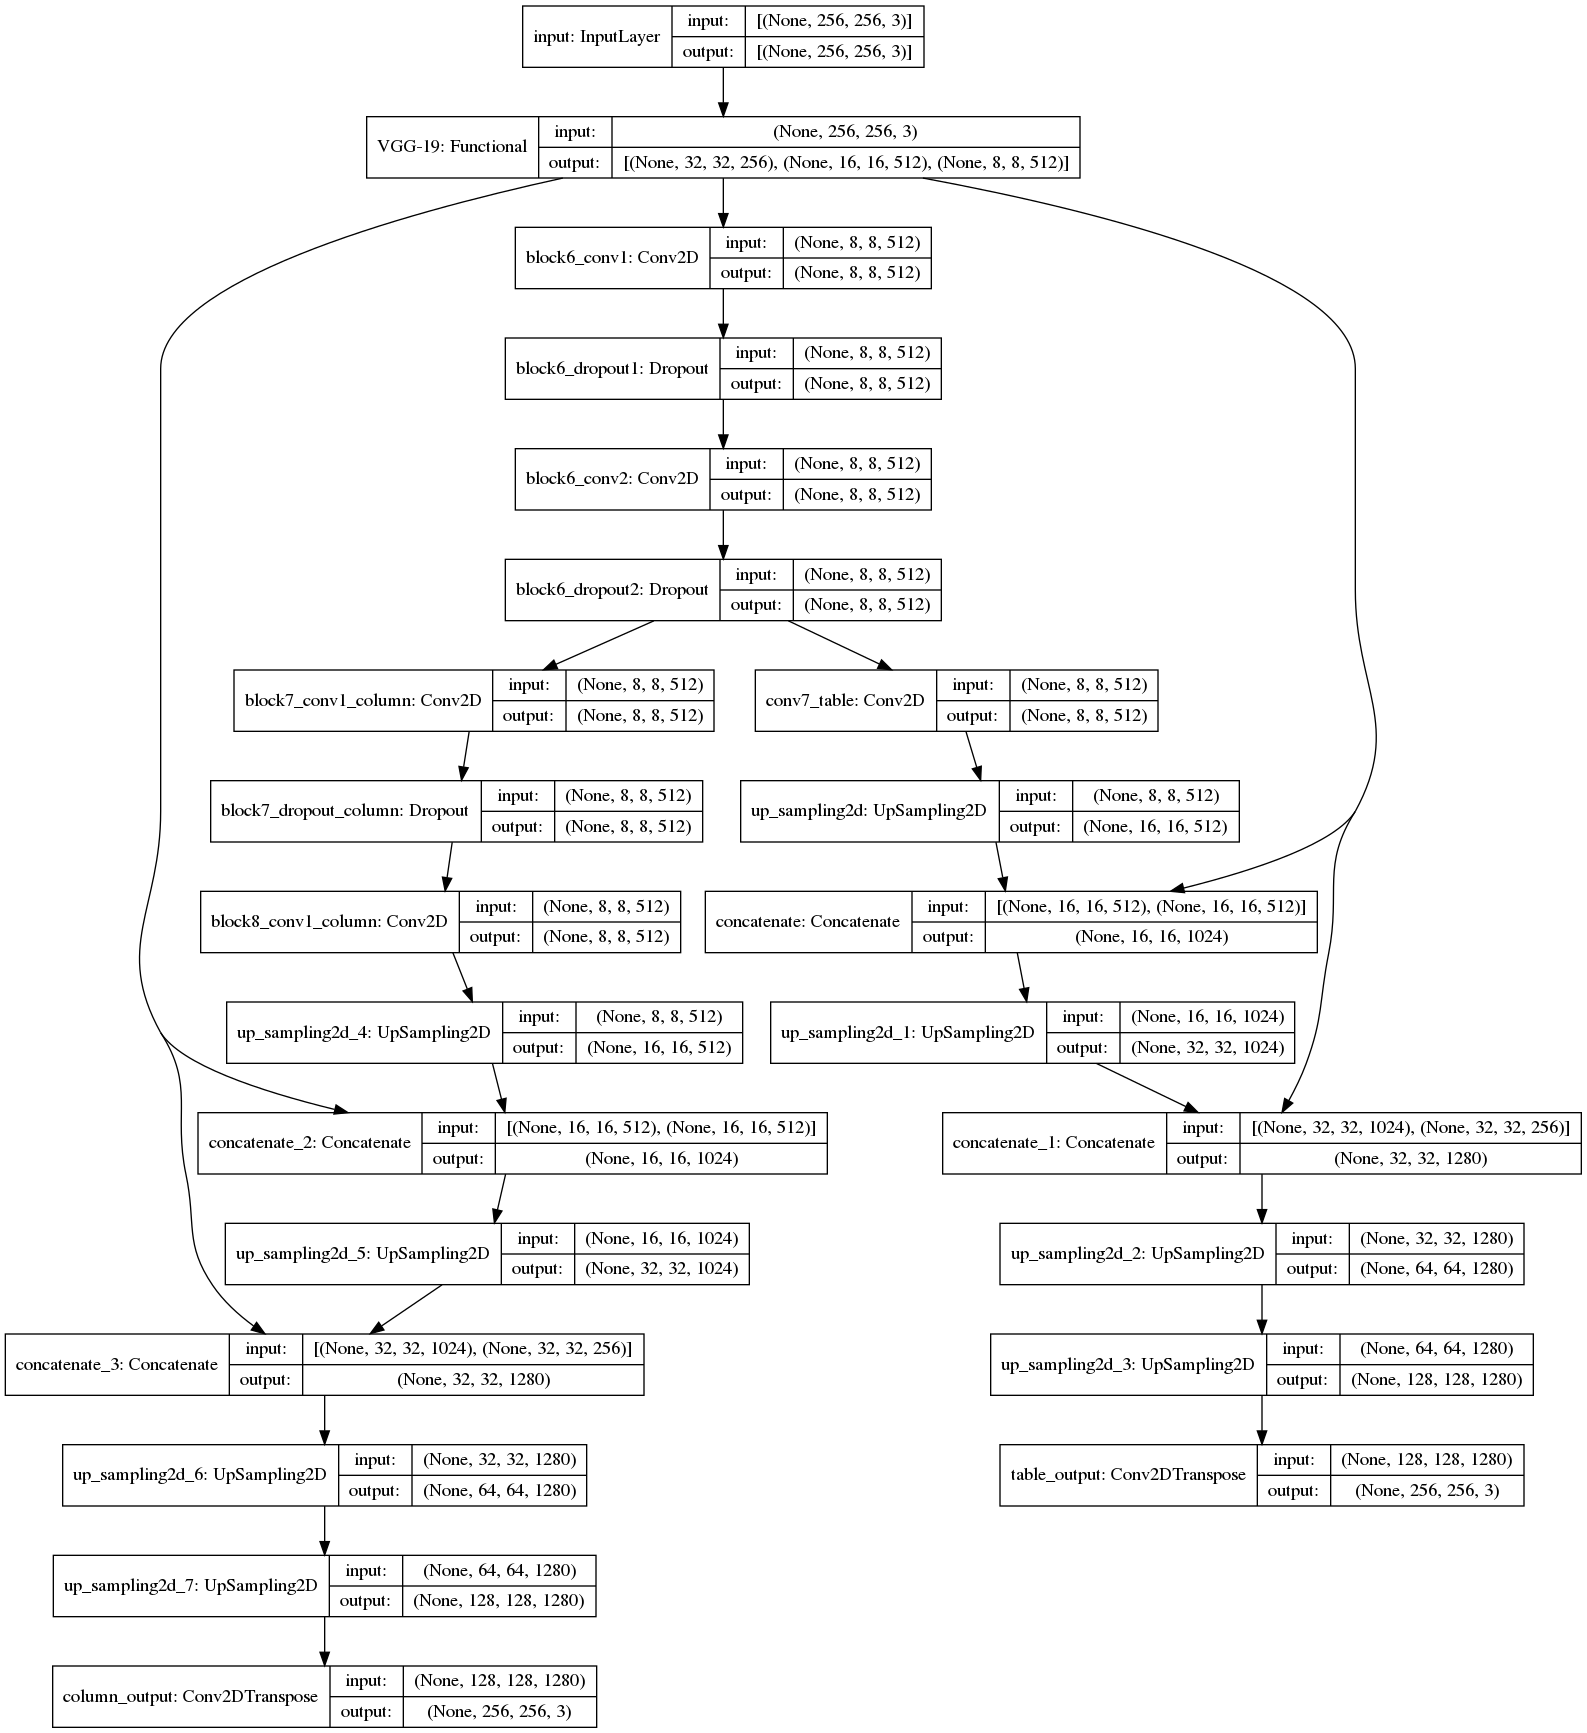

In [2]:
model = tf.keras.models.load_model('mymodel_957')
tf.keras.utils.plot_model(model, show_shapes=True)

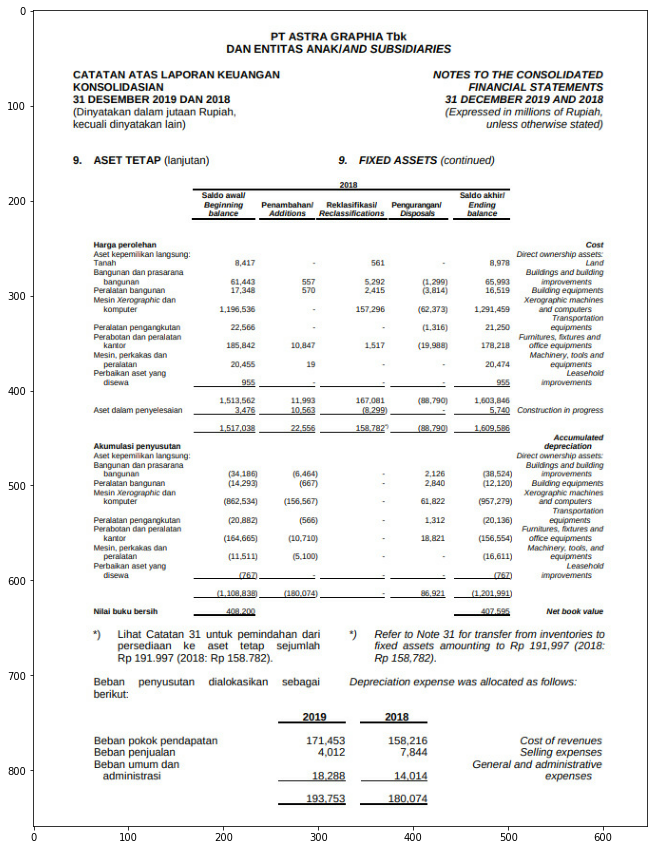

(859, 647, 3)
(859, 647, 1)
(859, 647, 3)
(859, 647, 3)


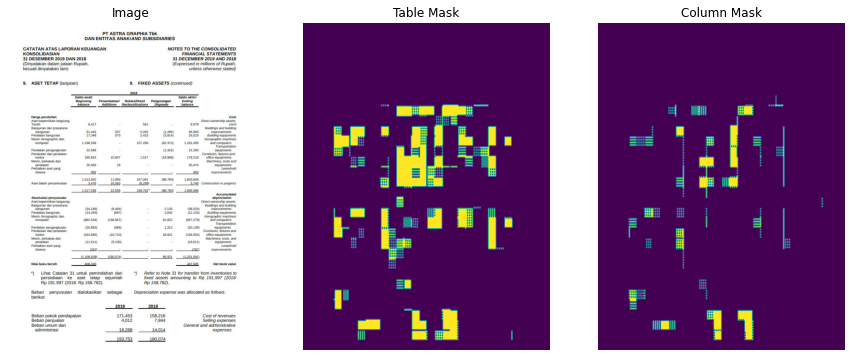

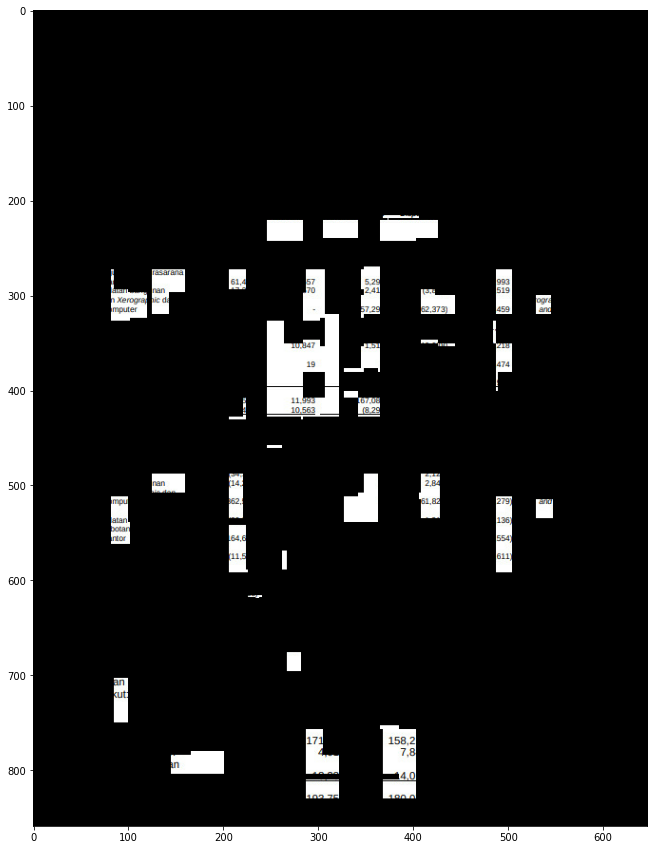

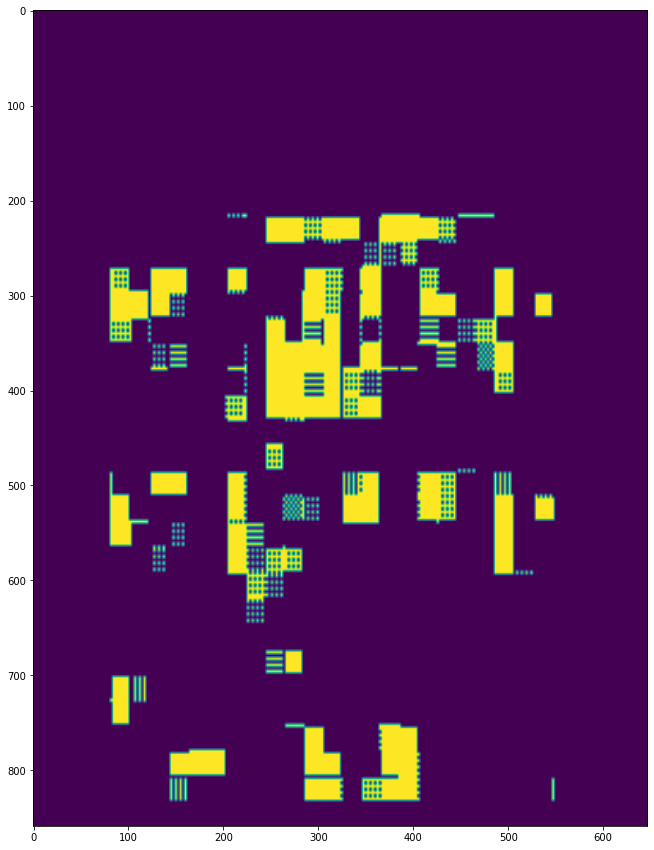

In [13]:
def create_mask(pred_mask1, pred_mask2):
  pred_mask1 = tf.argmax(pred_mask1, axis=-1)
  pred_mask1 = pred_mask1[..., tf.newaxis]


  pred_mask2 = tf.argmax(pred_mask2, axis=-1)
  pred_mask2 = pred_mask2[..., tf.newaxis]
  return pred_mask1[0], pred_mask2[0]

def apply_mask(image, table_mask, column_mask):
    tmask = tf.concat([table_mask, table_mask, table_mask], axis=-1)
    print(image.shape)
    print(tmask.shape)
    res = tf.math.multiply(image, tf.cast(tmask, tf.uint8))
    # res = tf.math.multiply(res, tf.cast(column_mask, tf.float32))
    return res

image_file = tf.io.read_file('dataset/test/test1.jpg')
image = tf.image.decode_jpeg(image_file, channels=3)
image_util.display_image(image)
image_input = tf.reshape(tf.image.resize(image, [256, 256]), (1, 256, 256, 3))
pred_mask1, pred_mask2 = model.predict(image_input)
table_mask, column_mask = create_mask(pred_mask1, pred_mask2)
table_mask = tf.image.resize(table_mask, image.shape[:2])
column_mask = tf.image.resize(column_mask, image.shape[:2])
print(image.shape)
print(table_mask.shape)
filtered_image = apply_mask(image, table_mask, column_mask)
image_util.display_image_and_masks(image, table_mask, column_mask)
image_util.display_image(filtered_image)
image_util.display_image(table_mask)